<a href="https://colab.research.google.com/github/sahiltambe18/DL_CLG/blob/main/DL_pg3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Image Classification:
Image classification is the task of categorizing images into predefined classes. Here's how it works:

- Input: An image is represented as a 3D array of numbers (height × width × channels)
- For RGB images: 3 channels (Red, Green, Blue), each pixel value ranges from 0-255
- Preprocessing: Normalize values (usually to 0-1 range), resize images, augment data
- Feature Extraction: Extract important patterns and features from images
- Classification: Map these features to specific output classes using a trained model

2. CNN in Image Classification:
CNNs (Convolutional Neural Networks) are specialized neural networks for processing grid-like data (images). Here's a typical CNN architecture:

Key CNN components:
- **Convolutional Layer**: Applies filters to detect features (edges, textures, patterns)
- **Pooling Layer**: Reduces spatial dimensions while retaining important information
- **Activation Functions**: Adds non-linearity (ReLU is commonly used)
- **Fully Connected Layers**: Final classification based on extracted features

3. PyDrive:
PyDrive is a wrapper library for Google Drive API that simplifies:
- Authentication with Google Drive
- File upload/download operations
- File management (create, delete, move)
- File sharing and permissions

Example usage:
```python
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

# Authenticate
gauth = GoogleAuth()
gauth.LocalWebserverAuth()
drive = GoogleDrive(gauth)

# Upload file
file = drive.CreateFile({'title': 'test.txt'})
file.SetContentString('Hello World!')
file.Upload()
```

4. tqdm:
tqdm is a progress bar library that shows:
- Progress of iterations (loops, data loading)
- Estimated time remaining
- Current speed of iteration
- Total time elapsed

Example usage:
```python
from tqdm import tqdm
import time

# Simple loop with progress bar
for i in tqdm(range(100)):
    time.sleep(0.1)

# With data loading
for batch in tqdm(data_loader, desc="Training"):
    # process batch
    pass
```

5. Keras Layers:

A. Dense Layer:
```python
# Fully connected layer
layers.Dense(units=64, activation='relu')
```
- Each neuron connected to all neurons in previous layer
- Used for: Final classification, feature combination
- Parameters:
  - units: Number of neurons
  - activation: Activation function
  - input_shape: Required for first layer

B. Flatten Layer:
```python
# Convert multi-dimensional input to 1D
layers.Flatten()
```
- Converts 2D/3D input to 1D vector
- No parameters to learn
- Used between Conv layers and Dense layers
- Example: (batch_size, 7, 7, 64) → (batch_size, 3136)

C. Dropout Layer:
```python
# Randomly disable neurons during training
layers.Dropout(rate=0.5)
```
- Prevents overfitting
- Randomly deactivates neurons during training
- rate: Fraction of units to drop (e.g., 0.5 = 50%)
- Only active during training, not during inference

Here's a complete example combining these layers:

```python
model = tf.keras.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten for dense layers
    layers.Flatten(),
    
    # Dense layers with dropout
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    
    # Output layer
    layers.Dense(10, activation='softmax')
])
```

Each layer type has its specific purpose:
- Dense: Final classification, feature combination
- Flatten: Dimension reduction for Dense layers
- Dropout: Regularization, preventing overfitting
- Conv2D: Feature extraction from images
- MaxPooling2D: Dimension reduction, feature selection

The combination of these layers allows the network to:
1. Extract features from raw images
2. Combine these features meaningfully
3. Prevent overfitting during training
4. Make final classifications effectively

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

W_grid = 10
L_grid = 10




Text(0.5, 1.0, 'Class distribution in training set')

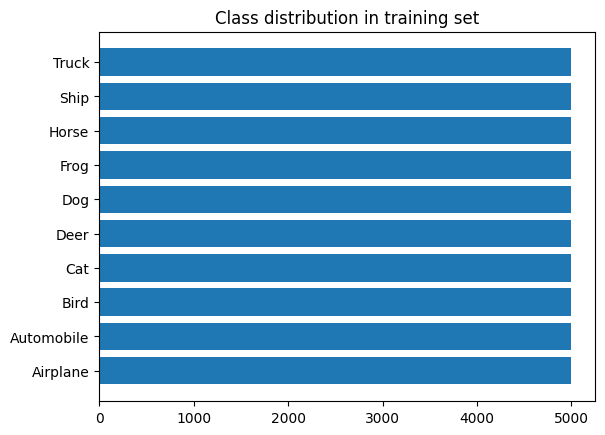

In [ ]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

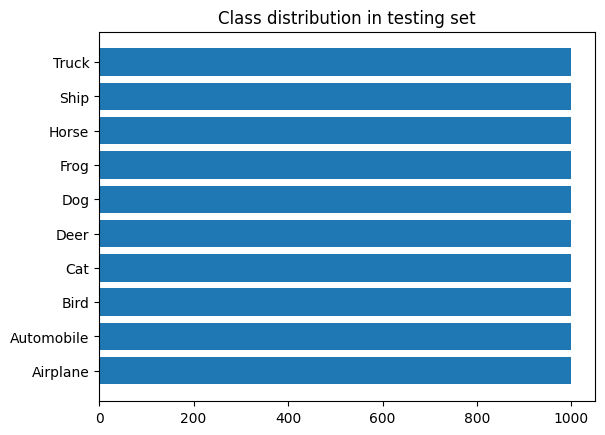

In [ ]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

In [ ]:

X_train = X_train / 255.0
X_test = X_test / 255.0


y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [ ]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=15,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test),
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.3344 - loss: 1.8642 - precision: 0.5052 - recall: 0.1203 - val_accuracy: 0.5489 - val_loss: 1.2525 - val_precision: 0.7151 - val_recall: 0.3544
Epoch 2/15
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5000 - loss: 1.4369 - precision: 0.6923 - recall: 0.2812

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.5000 - loss: 1.4369 - precision: 0.6923 - recall: 0.2812 - val_accuracy: 0.5475 - val_loss: 1.2593 - val_precision: 0.7176 - val_recall: 0.3578
Epoch 3/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 59s 26ms/step - accuracy: 0.5371 - loss: 1.2846 - precision: 0.7102 - recall: 0.3619 - val_accuracy: 0.6711 - val_loss: 0.9412 - val_precision: 0.8141 - val_recall: 0.5360
Epoch 4/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.6250 - loss: 1.0915 - precision: 0.8824 - recall: 0.4688 - val_accuracy: 0.6661 - val_loss: 0.9501 - val_precision: 0.8115 - val_recall: 0.5314
Epoch 5/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.6183 - loss: 1.0842 - precision: 0.7607 - recall: 0.4782 - val_accuracy: 0.7006 - val_loss: 0.8646 - val_precision: 0.8036 - val_recall: 0.5978
Epoch 6/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.5938 - loss: 0.9625 - precision: 0.7826 - recall: 0.5625 - val_accuracy: 0.6999 - val

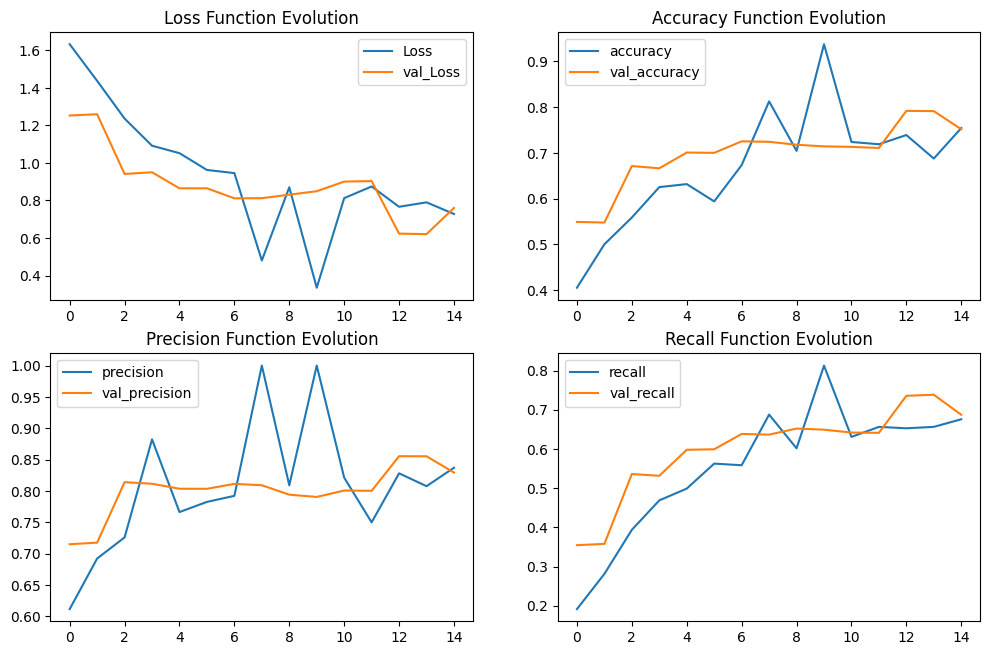

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [ ]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7480 - loss: 0.7613 - precision: 0.8219 - recall: 0.6886
Test Accuracy : 75.15%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1000
           1       0.77      0.94      0.84      1000
           2       0.78      0.56      0.65      1000
           3       0.70      0.44      0.54      1000
           4       0.75      0.72      0.73      1000
           5       0.79      0.53      0.63      1000
           6       0.68      0.90      0.78      1000
           7       0.73      0.87      0.80      1000
           8       0.91      0.80      0.85      1000
           9       0.72      0.92      0.81      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.74     10000
weighted avg       0.76      0.75      0.74     10000

